In [1]:
import pandas as pd
data = pd.read_csv('C:\\Users\\ShahinN\\Desktop\\data.txt')
data.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = data.values[:, 1:], data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


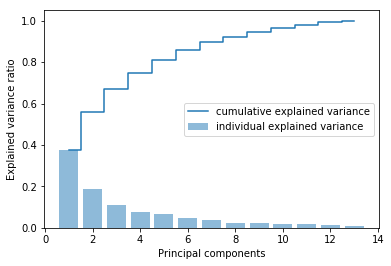

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]                               
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [7]:
# Feature transformation
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

In [8]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))                                                   
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [10]:
X_train_std[:].dot(w)

array([[ 2.59891628,  0.00484089],
       [ 0.15819134, -2.26659577],
       [-2.6372337 ,  2.66488569],
       [-2.52848449,  0.51846618],
       [ 1.70922581, -0.91719459],
       [-2.83057003,  0.41936129],
       [-2.82251879,  1.99763147],
       [ 1.36618015,  0.04639099],
       [-2.46584868, -0.07932269],
       [-2.28554906, -0.40096658],
       [ 1.14246632, -2.39587633],
       [-2.28497881, -1.09274988],
       [-2.52924945,  0.6477328 ],
       [ 0.169245  , -1.1264982 ],
       [ 2.53088166,  1.05798498],
       [-0.71596964, -2.80365836],
       [ 2.46922033, -0.15871191],
       [-0.58044574, -0.69290749],
       [ 0.54583852,  0.41042188],
       [ 3.5604963 ,  1.42561284],
       [ 1.58679826, -1.51260121],
       [ 2.54872139, -0.05280515],
       [-3.59338727,  0.88321901],
       [-1.60406659,  2.40373662],
       [ 1.48668426, -1.40863724],
       [ 0.00830468, -2.04898307],
       [-0.15646658, -2.80278355],
       [-2.39863877,  2.47524175],
       [-3.13549157,

In [12]:
X_train_pca = X_train_std.dot(w)

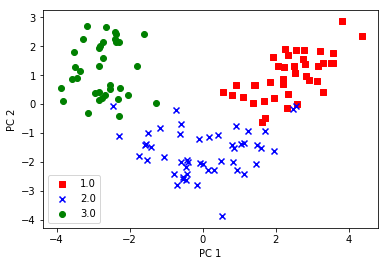

In [13]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
   
 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()